### Setup

Import required libaries

In [41]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=DESKTOP-3G2D9G9\MSSQLSERVER01;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

In [3]:
cursor = conn.cursor()

In [32]:
query = "select count(s1.BusinessEntityID) as tot_store, sum(AnnualRevenue) as tot_rev, StateProvinceName from Sales.vStoreWithDemographics s1 join Sales.vStoreWithAddresses s2 on s1.BusinessEntityID = s2.BusinessEntityID where CountryRegionName='United States' group by StateProvinceName; "

In [33]:
salesdata = pd.read_sql(query, conn)

C:\Users\Generation UK&I\AppData\Local\Temp\ipykernel_18520\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


In [34]:
salesdata.head()

,tot_store,tot_rev,StateProvinceName
0,6,1130000.0,Alabama
1,13,2050000.0,Arizona
2,78,11920000.0,California
3,10,1110000.0,Colorado
4,9,1250000.0,Connecticut


In [23]:
states = gpd.read_file("./us-states.json")

In [107]:
salesdata["tot_rev_fm"] = (salesdata["tot_rev"].round(0) / 10000).astype(int)

In [108]:
data_states = states.merge(salesdata, right_on=["StateProvinceName"], left_on=['name'], how="left").drop([1, 10])

<Axes: >

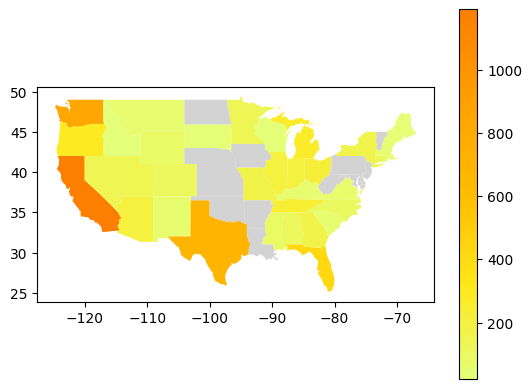

In [110]:
data_states.plot(column="tot_rev_fm", legend=True, cmap="Wistia", missing_kwds={'color': 'lightgrey'})